Question 8

Load the Bank Marketing dataset and prepare it for classification (e.g., predicting if a client will subscribe to a term deposit).Pre-process the data. Split the dataset into training and testing sets (e.g., 70% training, 30% testing). Evaluate its accuracy and confusion matrix, f1-score, precision, recall and ROC curve. Interpret the results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\OneDrive\Desktop\ML_PRAC\ML_PRAC\bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
for i in df.columns:
    print("Column name :",i)
    print(df[i].unique())
    print("         ")

Column name : age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
         
Column name : job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
         
Column name : marital
['married' 'single' 'divorced']
         
Column name : education
['secondary' 'tertiary' 'primary' 'unknown']
         
Column name : default
['no' 'yes']
         
Column name : balance
[2343   45 1270 ... 1594 2593 -134]
         
Column name : housing
['yes' 'no']
         
Column name : loan
['no' 'yes']
         
Column name : contact
['unknown' 'cellular' 'telephone']
         
Column name : day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
         
Column name : month
['may' 

In [7]:
for i in df.columns:
    if 'unknown' in df[i].unique():
        print(df[i].value_counts())
        print("\n")

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64


education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64


contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64


poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64




In [8]:
df['job']=df['job'].replace('unknown','management')

In [9]:
df['education']=df['education'].replace('unknown','secondary')

In [10]:
df['contact']=df['contact'].replace('unknown','cellular')

In [11]:
df=df.drop('poutcome',axis=1)

In [12]:
df['job']=df['job'].str.rstrip(".")

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin,married,secondary,no,2343,yes,no,cellular,5,may,1042,1,-1,0,yes
1,56,admin,married,secondary,no,45,no,no,cellular,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,cellular,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,cellular,5,may,579,1,-1,0,yes
4,54,admin,married,tertiary,no,184,no,no,cellular,5,may,673,2,-1,0,yes


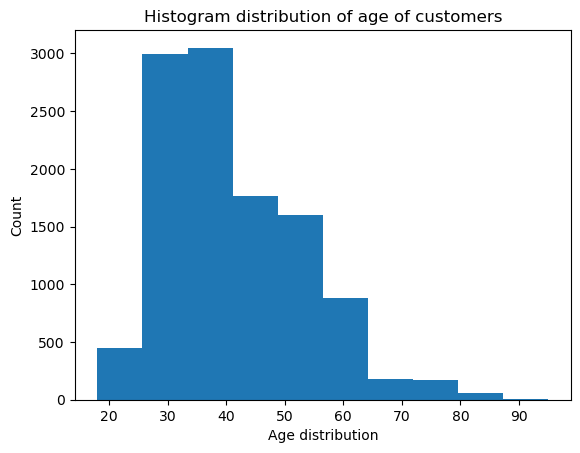

In [14]:
plt.hist(df['age'])
plt.title("Histogram distribution of age of customers")
plt.ylabel("Count")
plt.xlabel('Age distribution')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['default']=le.fit_transform(df['default'])
df['housing']=le.fit_transform(df['housing'])
df['loan']=le.fit_transform(df['loan'])
df['contact']=le.fit_transform(df['contact'])
df['month']=le.fit_transform(df['month'])
df['deposit']=le.fit_transform(df['deposit'])

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,0,2343,1,0,0,5,8,1042,1,-1,0,1
1,56,0,1,1,0,45,0,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,0,1270,1,0,0,5,8,1389,1,-1,0,1
3,55,7,1,1,0,2476,1,0,0,5,8,579,1,-1,0,1
4,54,0,1,2,0,184,0,0,0,5,8,673,2,-1,0,1


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [22]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8371, 15), (2791, 15), (8371,), (2791,))

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt=DecisionTreeClassifier()

In [25]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred=dt.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score,classification_report,roc_curve,RocCurveDisplay,confusion_matrix,auc

In [44]:
accuracy_score(y_test,y_pred)

0.5320673593694016

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68      1478
           1       0.52      0.06      0.11      1313

    accuracy                           0.53      2791
   macro avg       0.53      0.51      0.40      2791
weighted avg       0.53      0.53      0.41      2791



In [53]:
confusion_matrix(y_test,y_pred)

array([[1401,   77],
       [1229,   84]], dtype=int64)

In [47]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

In [51]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)

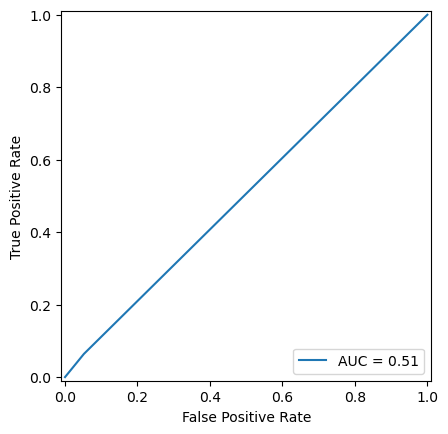

In [52]:
display.plot()
plt.show()